# Лабораторная работа №1
Найти первые 5-6 собственных функций для дифференциального оператора, которые соответствуют минимальным собственным значениям. Для поиска использовать итерационный метод Релэя, начальные приближения собственных значений подбираются вручную.
## Вариант №11
В неглубокой потенциальной яме находится частица. Потенциал вне ямы равен $U_0 = 400/l^2$. Найти уровни энергии связанных состояний частицы и соответствующие волновые функции. Задачу решать в ограниченной области $[-2l, 2l]$ с заданием нулевых начальных условий.
$$ 
\displaystyle
\begin{equation*}
 \begin{cases}
   \displaystyle \bigg[-\frac{d^2}{dx^2} + U_0 \eta(|x| - l)    \bigg] \psi = \lambda \psi(x) & x \in \mathbb{R} \\
   \displaystyle \lim_{x \to \pm \infty} \psi(x) = 0
 \end{cases}
\end{equation*} 
$$

В решении чередуются квантовые состояния с четными 
$$
\displaystyle
\begin{equation*}
\psi_n(x) = 
 \begin{cases}
   \displaystyle e^{-\sqrt{U_0 - \lambda_n} l} \cos{\sqrt{\lambda_n}x} & |x| < l \\
   \displaystyle e^{-\sqrt{U_0 - \lambda_n}|x|}\cos{\sqrt{\lambda_n} l}  & |x| \geqslant l
 \end{cases}
\end{equation*}
$$
$\lambda_n = \Big(\displaystyle \frac{\mu_n}{l} \Big)^2$, $\mu_n$ - корни $\displaystyle \cos{\mu} = \pm \frac{\mu}{\mu_0}$, такие что $\text{tg}{\mu} > 0$, $\mu_0=l\sqrt{U_0}=20$

и нечетными волновыми функциями:
$$
\displaystyle 
\begin{equation*}
\psi_n(x) = 
 \begin{cases}
   \displaystyle e^{-\sqrt{U_0 - \lambda_n} l} \sin{\sqrt{\lambda_n}x} & |x| < l \\
   \displaystyle \text{sgn}(x)e^{-\sqrt{U_0 - \lambda_n}|x|}\sin{\sqrt{\lambda_n} l}  & |x| \geqslant l
 \end{cases}
\end{equation*}
$$
$\lambda_n = \Big(\displaystyle \frac{\mu_n}{l} \Big)^2$, $\mu_n$ - корни $\displaystyle \sin{\mu} = \pm \frac{\mu}{\mu_0}$, такие что $\text{tg}{\mu} < 0$, $\mu_0=l\sqrt{U_0}=20$

Импортируем библиотеки, и функции, вынесенные в отдельные файлы

In [5]:
import numpy as np
from matplotlib import pyplot as plt
from lib.rayleigh_iterations import rayleigh_method_for_TM
from lib.bisection_method import bisection_method
import matplotlib.patches as mpatches
from lib.solver import get_eigs, get_exact_eigfuncs
%matplotlib inline

Зададим основные параметры программы

In [6]:
plt.rcParams["figure.figsize"] = (14, 8)
e = 1e-14 # точность, передаваемая в метод Рэлея и метод дихотомии
l = 10
steps = [0.1, 0.01, 0.001]
h = steps[2]
mu0 = 20
init_lambds_appr = [0.02, 0.09, 0.2, 0.36, 0.56] # подобранные начальные приближения
x = np.arange(-2*l, 2*l, h) + 0.5 * h # центры объемов
u0 = 400/ l**2
u = u0 * np.heaviside(np.abs(x) - l, 1)

Для начала получим точные решения. Точность их правда будет несколько условной, так как, чтобы их получить, мы будем численно решать тренсцендентные уравнения на собственные значения. Для их решения использовался метод дихотомии. Ниже приведен график, на котором точками отмечены решения уравнения. По графику были определены отрезки, на которых искалось решение.


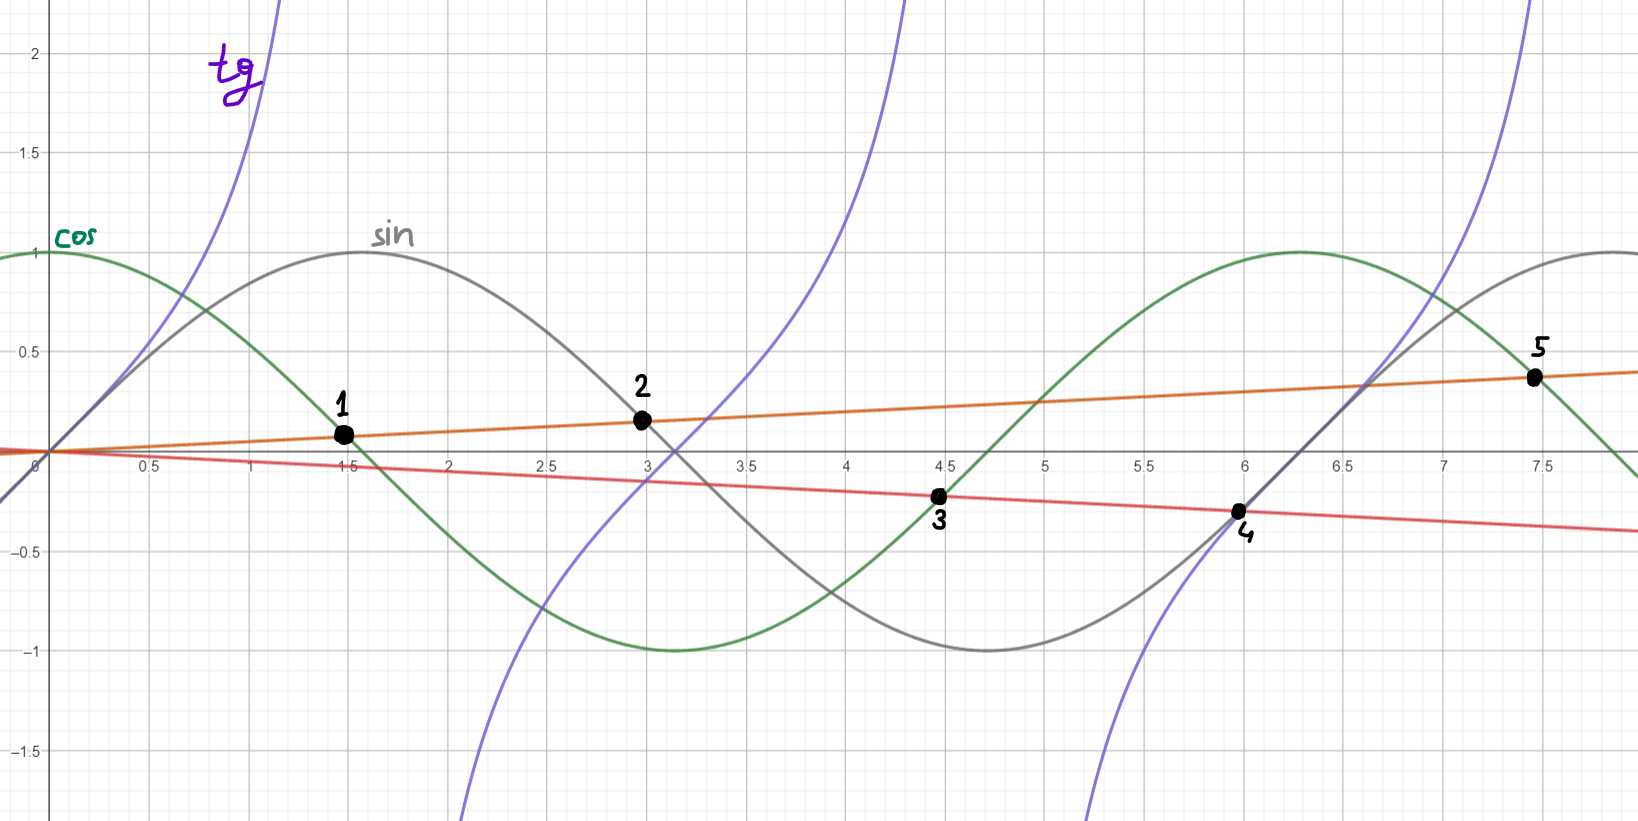

In [7]:
mu = []
mu.append(bisection_method(lambda x: np.cos(x) - x / mu0, 1.25, 1.75, e))
mu.append(bisection_method(lambda x: np.sin(x) - x / mu0, 2.75, 3.25, e))
mu.append(bisection_method(lambda x: np.cos(x) + x / mu0, 4.25, 4.75, e))
mu.append(bisection_method(lambda x: np.sin(x) + x / mu0, 5.75, 6.25, e))
mu.append(bisection_method(lambda x: np.cos(x) - x / mu0, 7.25, 7.75, e))
mu = np.array(mu)
lambds_exact = (mu / l) ** 2

Получив собственные значения, получим аналитические собственные функции.

In [8]:
funcs_exact = get_exact_eigfuncs(l, h, lambds_exact)

А теперь пора перейти к самому интересному, поиску собственных значений и функции численно. Начальные приближения СЗ были подобраны вручную и определены выше. Начальными приближения функций были выбраны $\cos{x}$ для четных уровней и $\sin{x}$ для нечетных.

Внутри метода матрица оператора хранится в виде 2 массивов (в силу самосопряженности оператора и того, что матрица трехдиагональная). При решении используется метод прогонки. (Выбранный шаг сейчас $h=0.001$ при $l=10$ влечет за собой матрицу оператора $40000\times40000$).

In [9]:
lambds, funcs = get_eigs(l, h, init_lambds_appr)

Построим красивую картинку. Для каждой функции сдвинем ось OX по вертикали, и немного сожмем функции, чтобы они визуально помещались в яме.

Text(0.5, 1.0, 'Уровни энергии в потенциальной яме')

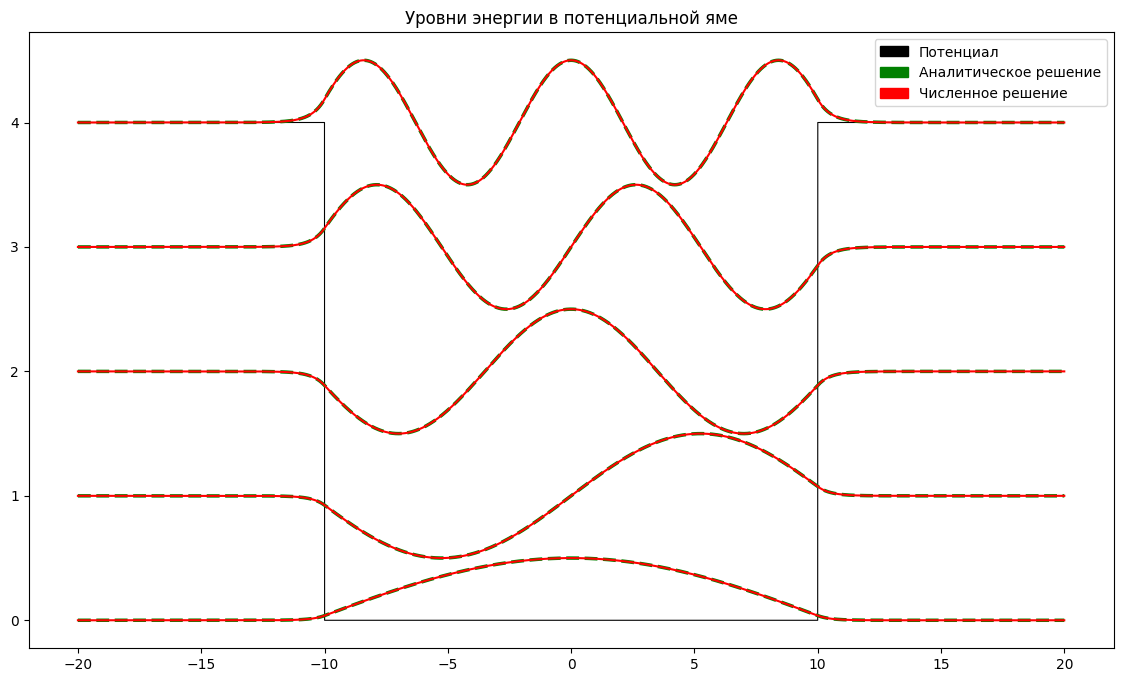

In [10]:
plt.plot(x, u, color='black', linewidth=0.8)
for i, func in enumerate(funcs_exact):
    plt.plot(x, func * 0.5 + i, '--', color='green', linewidth=2.5)
for i, func in enumerate(funcs):
    # СФ определены с точностью до константы, для красоты повернем их в одну сторону
    if func[int(l * 0.2)] * funcs_exact[i][int(l * 0.2)] < 0: 
        func *= -1
    plt.plot(x, func * 0.5 + i, color = 'red', linewidth=1.5)
plt.legend(handles = [mpatches.Patch(color='black', label='Потенциал'),
                      mpatches.Patch(color='green', label='Аналитическое решение'),
                      mpatches.Patch(color='red', label='Численное решение')])
plt.title("Уровни энергии в потенциальной яме")

Построим графики погрешностей.

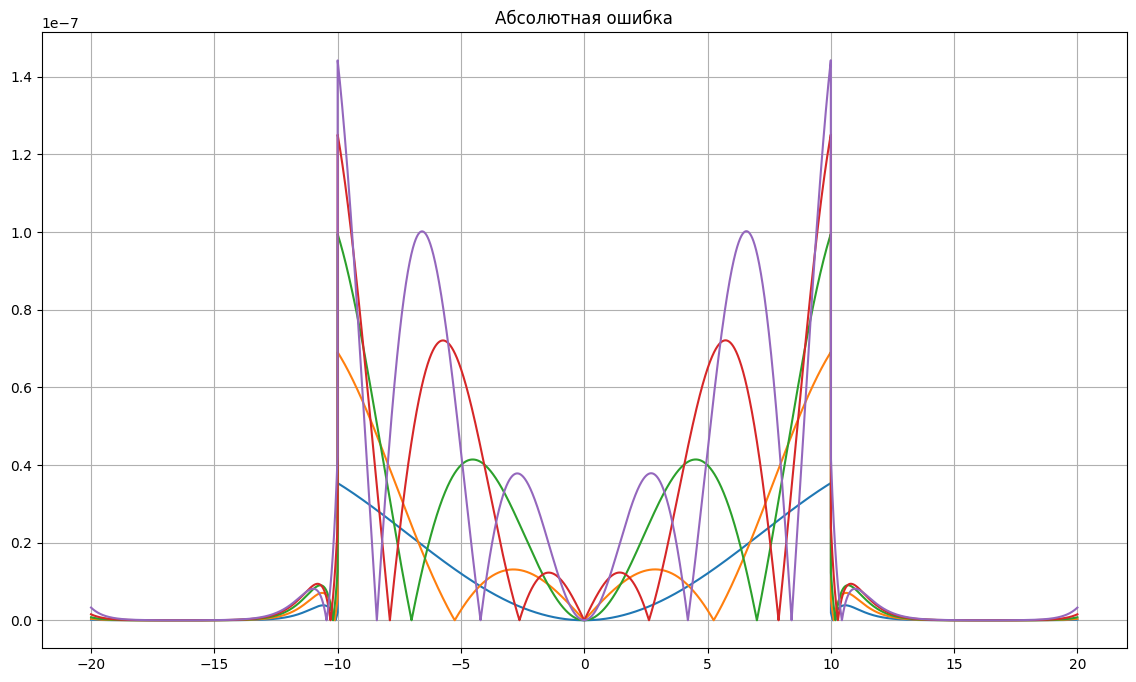

In [11]:
for func_exact, func in zip(funcs_exact, funcs):
    plt.plot(x, np.abs(np.abs(func_exact) - np.abs(func)))
plt.title('Абсолютная ошибка')
plt.grid(True)

Проверим порядок аппроксимации метода. Для этого построим логарифмический график зависимости максимальной ошибки на отрезке от шага сетки для минимального уровня энергии.

[0.00035054724925093206, 3.532635209316237e-06, 3.535185490177728e-08]


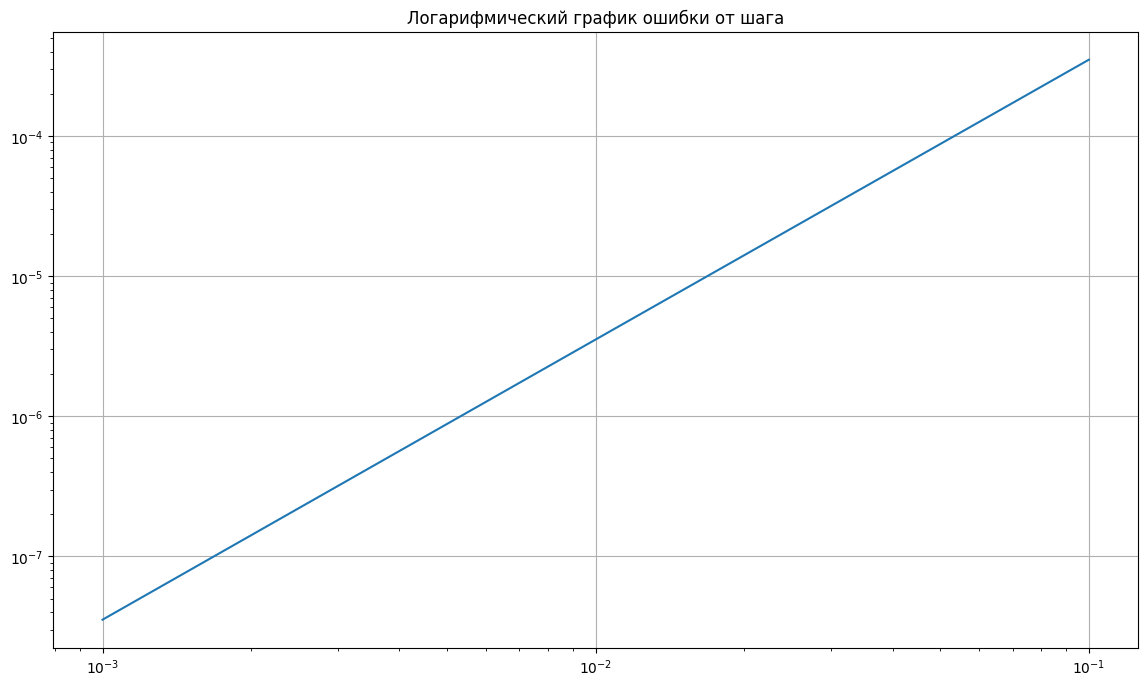

In [15]:
max_err = []
for step in steps:
    func_exact = get_exact_eigfuncs(l, step, lambds_exact[0:1])
    _, func = get_eigs(l, step, init_lambds_appr[0:1])
    max_err.append(np.max(np.abs(np.abs(func_exact) - np.abs(func))))
print(max_err)
plt.loglog(steps, max_err)
plt.title("Логарифмический график ошибки от шага")
plt.grid(True)

Порядок аппроксимации близок к 2, как и должно быть.